# In this notebook, we predict crops that are suitable to harvest according to the chemical present in the soil.

In [47]:
# importing necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 
from sklearn.metrics import classification_report # It is used to generate a comprehensive report that includes precision, recall, F1-score, and other metrics for evaluating the performance of the crop recommendation model.
from sklearn import metrics # In a crop recommendation system, you might use various metrics from this module, such as accuracy, precision, recall, or F1-score, to assess the performance of the recommendation model. These metrics help you understand how well the model is predicting the correct crop choices based on the input data.
from sklearn import tree #  Decision trees are commonly used for classification tasks, and they can be useful in predicting suitable crop choices based on input features.
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# reading dataset

df=pd.read_csv("/Users/bibekrai/workspace/Crop-Recommendation/crop-recommendation.csv")

# Performing basic EDA

In [49]:
df.drop(columns='Unnamed: 0',inplace=True)

In [50]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20,82,82,202,rice
1,85,58,41,21,80,80,226,rice
2,60,55,44,23,82,82,263,rice
3,74,35,40,26,80,80,242,rice
4,78,42,42,20,81,81,262,rice


In [51]:
df.tail

<bound method NDFrame.tail of         N   P   K  temperature  humidity  ph  rainfall   label
0      90  42  43           20        82  82       202    rice
1      85  58  41           21        80  80       226    rice
2      60  55  44           23        82  82       263    rice
3      74  35  40           26        80  80       242    rice
4      78  42  42           20        81  81       262    rice
...   ...  ..  ..          ...       ...  ..       ...     ...
2195  107  34  32           26        66  66       177  coffee
2196   99  15  27           27        56  56       127  coffee
2197  118  33  30           24        67  67       173  coffee
2198  117  32  34           26        52  52       127  coffee
2199  104  18  30           23        60  60       140  coffee

[2200 rows x 8 columns]>

In [52]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [53]:
df.shape

(2200, 8)

In [54]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.120000,70.976364,70.976364,102.970000
std,36.917334,32.985883,50.647931,5.062696,22.263427,22.263427,54.948949
min,0.000000,5.000000,5.000000,8.000000,14.000000,14.000000,20.000000
25%,21.000000,28.000000,20.000000,22.000000,60.000000,60.000000,64.000000
50%,37.000000,51.000000,32.000000,25.000000,80.000000,80.000000,94.000000
75%,84.250000,68.000000,49.000000,28.000000,89.000000,89.000000,124.000000
max,140.000000,145.000000,205.000000,43.000000,99.000000,99.000000,298.000000


In [55]:
df.size

17600

In [56]:
df.dtypes

N               int64
P               int64
K               int64
temperature     int64
humidity        int64
ph              int64
rainfall        int64
label          object
dtype: object

In [57]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   N            2200 non-null   int64 
 1   P            2200 non-null   int64 
 2   K            2200 non-null   int64 
 3   temperature  2200 non-null   int64 
 4   humidity     2200 non-null   int64 
 5   ph           2200 non-null   int64 
 6   rainfall     2200 non-null   int64 
 7   label        2200 non-null   object
dtypes: int64(7), object(1)
memory usage: 137.6+ KB


In [59]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [60]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot: >

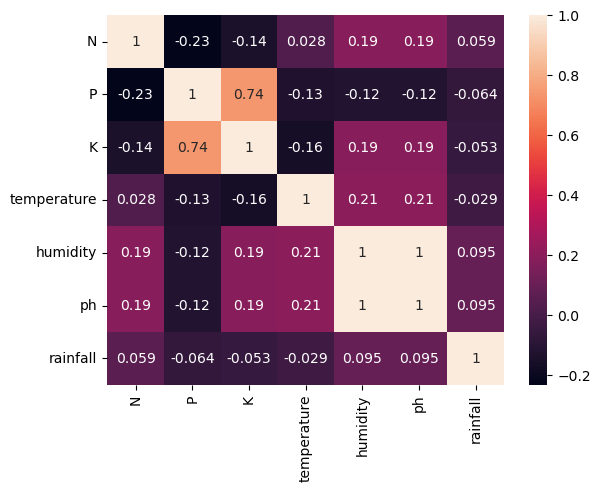

In [61]:
sns.heatmap(df.corr(),annot=True)

In [62]:
# seperating features and target label

features=df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target=df['label']
labels=df['label']

In [63]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [64]:
#train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=2,max_depth=5)  
classifier.fit(X_train,y_train)
predicted_values=classifier.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [66]:
from sklearn.model_selection import cross_val_score # cross_val is required to assess the performance and generalization ability of a model.

In [67]:
# Checking cross validation score of Decision Tree 

score = cross_val_score(classifier, features, target,cv=5)

In [68]:
score

array([0.93636364, 0.92272727, 0.92045455, 0.87272727, 0.93636364])

# Saving trained data model of Decision Tree

In [69]:
import pickle # It is used to save trained machine learning models to disk and later load them back into memory for making predictions or further analysis
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(classifier, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()
naivebayes.fit(X_train,y_train)
predicted_values=naivebayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))


Naive Bayes Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [71]:
# Checking cross validation score of Gaussian Naive Bayes

score = cross_val_score(naivebayes, features, target,cv=5)

In [72]:
score

array([0.99545455, 0.99090909, 0.98636364, 0.99090909, 0.98181818])

# Saving trained data model of Naive Bayes 

In [73]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(naivebayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [74]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)
predicted_values=SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Support Vector Machine')
print("Support Vector Machine Accuracy is: ", x)

print(classification_report(y_test,predicted_values))


Support Vector Machine Accuracy is:  0.08181818181818182
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.18      0.30        17
   blackgram       1.00      0.19      0.32        16
    chickpea       0.00      0.00      0.00        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       0.00      0.00      0.00        28
 kidneybeans       0.03      1.00      0.06        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.04      0.08        24
   muskmelon       1.00      0.13      0.23        23
      orange       1.00 

In [75]:
# Checking cross validation score of Support Vector Machine

score = cross_val_score(SVM, features, target,cv=5)

In [76]:
score

array([0.24545455, 0.27272727, 0.27045455, 0.25      , 0.24090909])

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)
predicted_values=LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is: ", x)

print(classification_report(y_test,predicted_values))



Logistic Regression Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.92      0.69      0.79        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.81      0.96      0.88        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.76      0.84      0.80        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00     

In [78]:
# Checking cross validation score of Logistic Regression

score = cross_val_score(LogReg, features, target,cv=5)

In [79]:
score

array([0.94772727, 0.95909091, 0.94772727, 0.96363636, 0.94318182])

# Saving trained data model of Logistic Regression

In [80]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=20, random_state=0)
randomforest.fit(X_train,y_train)
predicted_values=randomforest.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [82]:
# Checking cross validation score of Random Forest

score = cross_val_score(randomforest, features, target,cv=5)

In [83]:
score

array([1.        , 0.99545455, 0.99545455, 0.99090909, 0.98181818])

# Saving trained data model of Random Forest

In [84]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(randomforest, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [85]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
predicted_values=XB.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

[08:58:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
   

In [86]:
# Checking cross validation score of Logistic Regression

score = cross_val_score(XB, features, target,cv=5)

[08:58:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [87]:
score

array([0.99318182, 0.98409091, 0.99545455, 0.99318182, 0.98409091])

# Saving trained data model of XGBoost

In [88]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# Accuracy Comparison

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

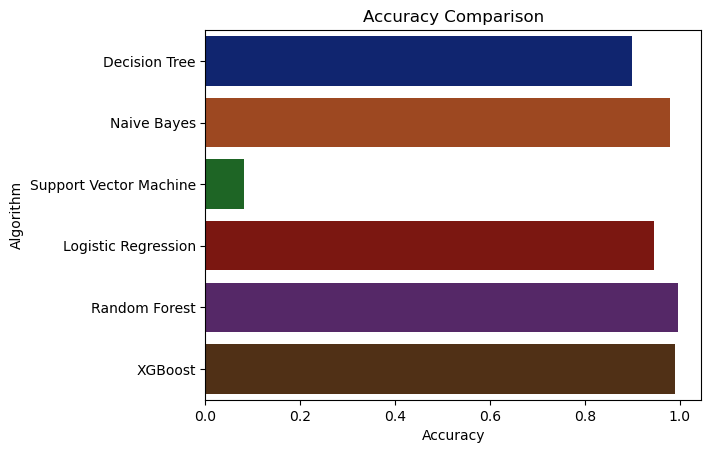

In [89]:
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [90]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.9795454545454545
Support Vector Machine --> 0.08181818181818182
Logistic Regression --> 0.9454545454545454
Random Forest --> 0.9954545454545455
XGBoost --> 0.9886363636363636


# Making a crop prediction

**Since, we have different accuracy of different ML models , we take Random Forest and Naive Bayes a they have higher accuracy rate**

In [91]:
#data=np.array([[Nitrogen,Phosphorous,potassium,temperature,humidity,ph value,rainfall]])
data=np.array([[93,40,62,53.2425,75.34234,32.634,20.79534]])
prediction=randomforest.predict(data)
print(prediction)

['muskmelon']


**Observation: using values of each chemical found in soil , we predict muskmelon to harvest**

In [92]:
data=np.array([[20,63,52,91.2425,75.34234,61.634,90.79534]])
prediction=randomforest.predict(data)
print(prediction)

['banana']


**Observation: using values of each chemical found in soil , we predict papaya to harvest**

# End